purpose: plot tissue enrichment from FUMA

# set-up

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from plotting_functions import IBM,colour_dict
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

# 54 tissue enrichment

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
deg={
'shared':pd.read_csv('fuma_tissue_enr/loco_final_cf-ext_top500/gtex_v8_ts_DEG.txt',sep='\t'),
'loco':pd.read_csv('fuma_tissue_enr/loco_final_cf_vsPCNet2.0/gtex_v8_ts_DEG.txt',sep='\t'),
'ext':pd.read_csv('fuma_tissue_enr/ext_top500vsPCNET2.0/gtex_v8_ts_DEG.txt',sep='\t')
}
for d in deg.keys():
    deg[d]['GeneSet']=deg[d]['GeneSet'].str.replace('_',' ')
    deg[d]=deg[d].sort_values('GeneSet',ascending=True)

In [10]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

offsets = {
    'shared': 0.0,
    'loco': -0.1,
    'ext': 0.1
}
label_dict={
    'shared':'network genes',
    'ext': 'human ext seed genes',
    'loco':'rat loco seed genes'
}
jitter=False


/tmp/ipykernel_1245691/2005769058.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/tmp/ipykernel_1245691/2005769058.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/tmp/ipykernel_1245691/2005769058.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

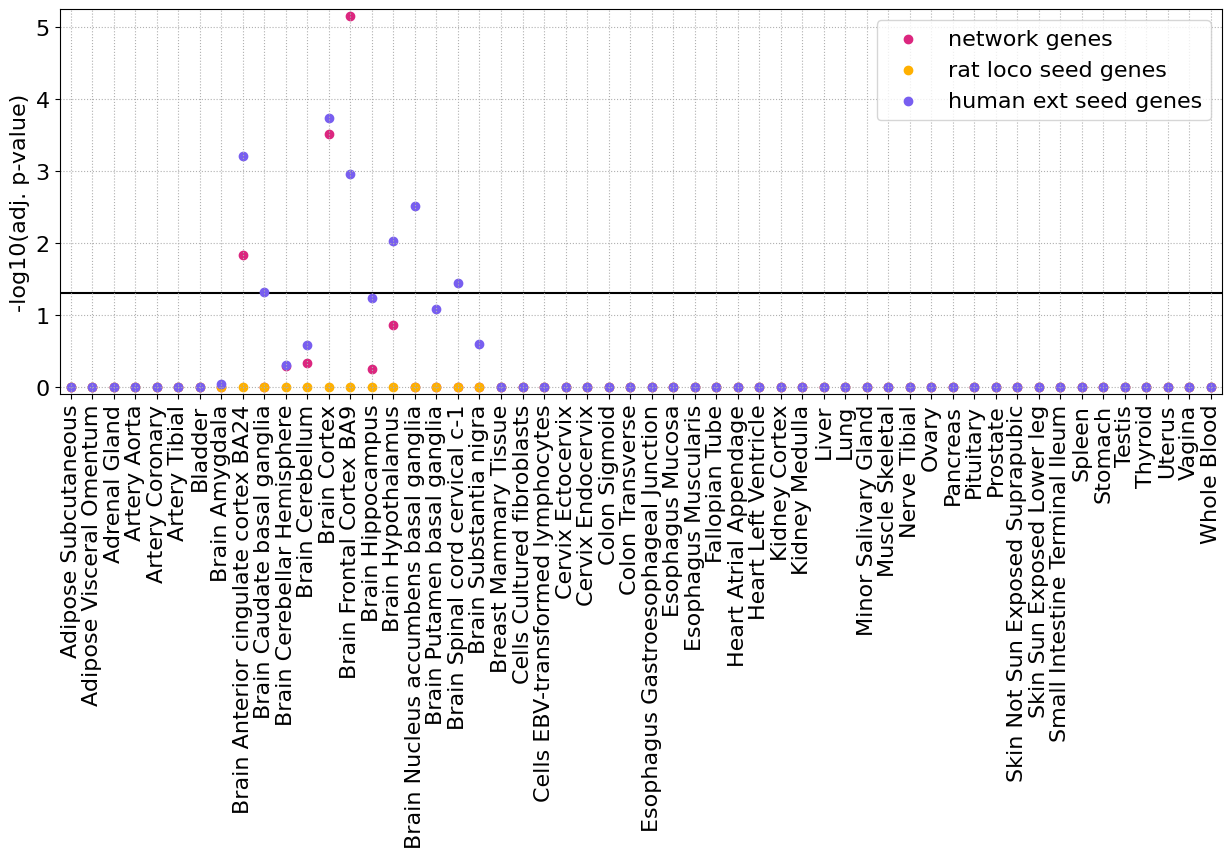

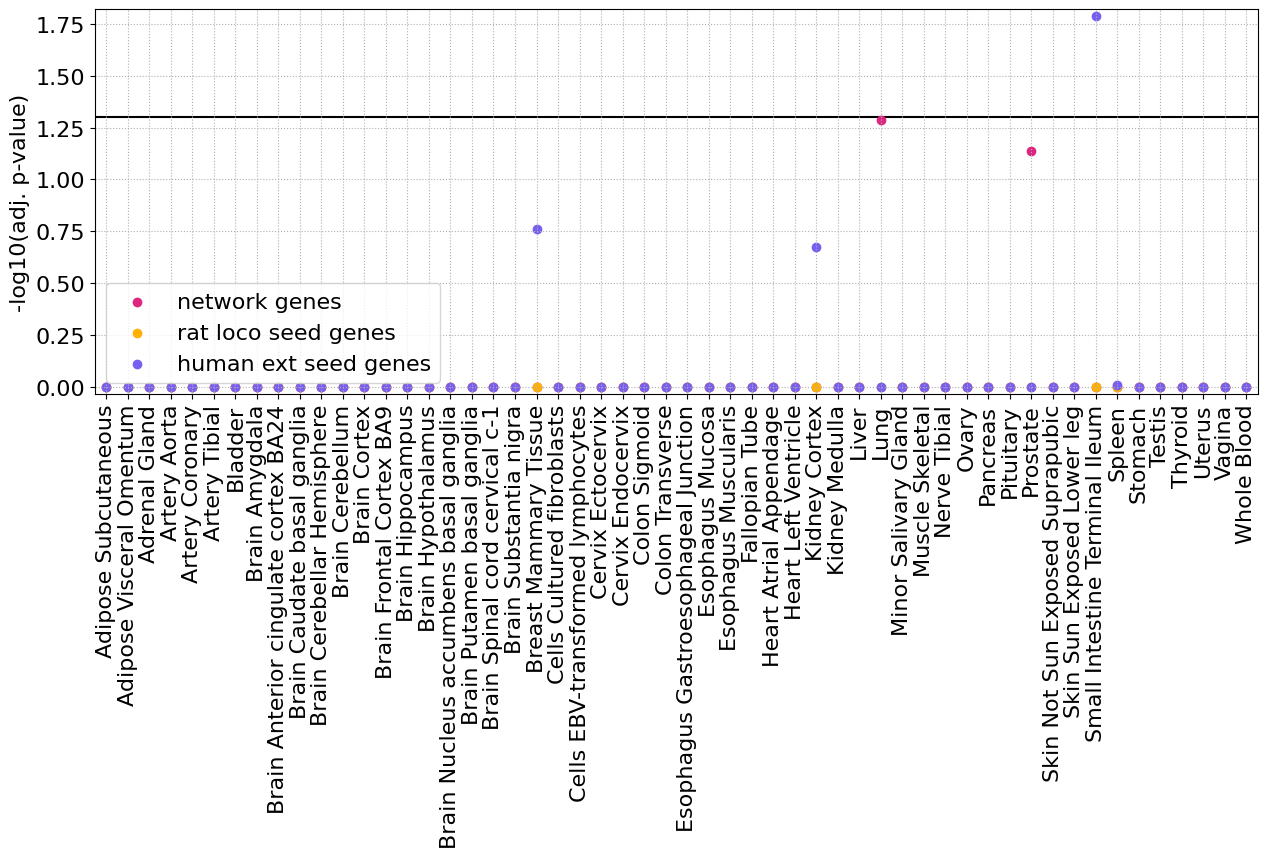

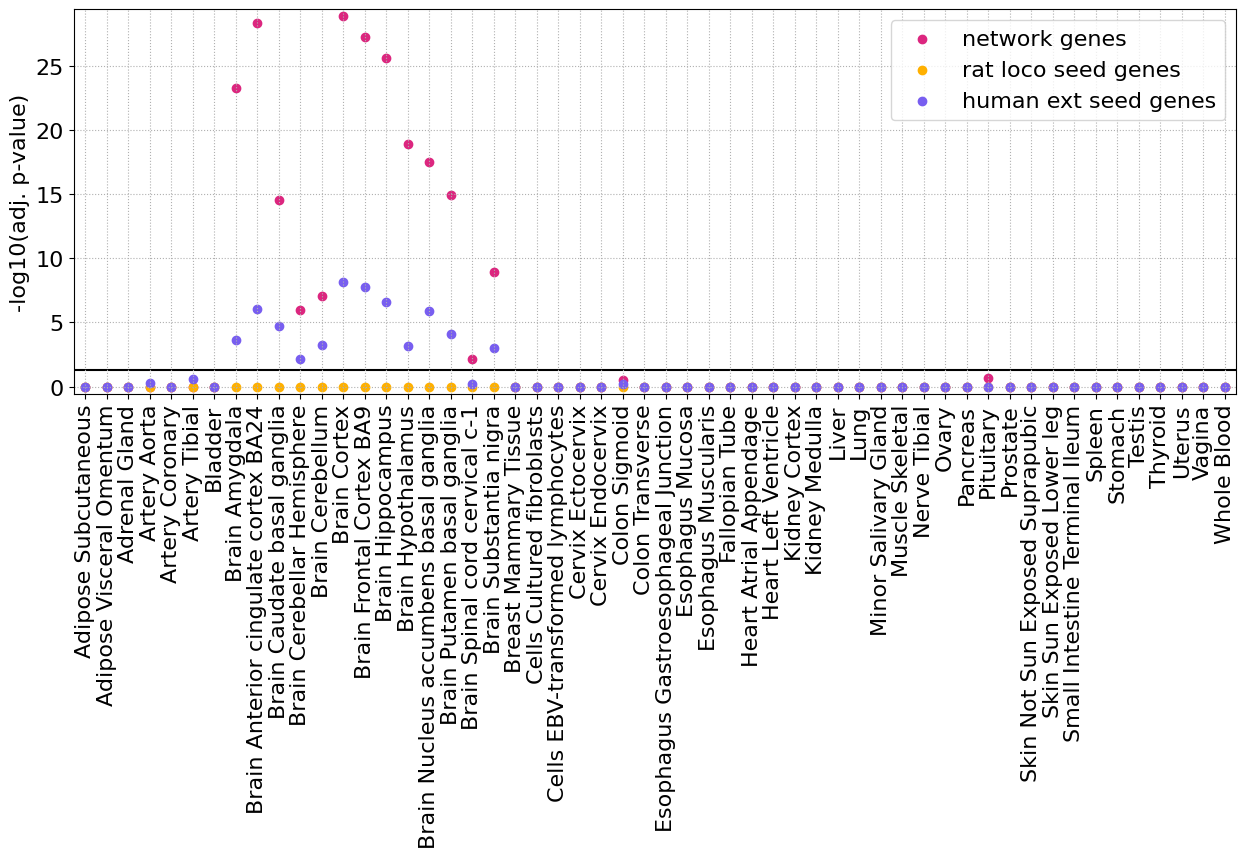

In [11]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
#all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}

for c in set(deg['shared'].Category):
    plt.figure(figsize=(15, 5))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axhline(y=-np.log10(0.05),color='black',zorder=0)
    
    plt.margins(x=0.01,y=0.02)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(x=t['y_numeric']+offset,y=-np.log10(t.adjP),color=colour_dict[d],label=label_dict[d])
    plt.ylabel('-log10(adj. p-value)')
    plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),rotation=90);
    plt.legend()
    plt.savefig(f'figures/DEG_54_{c}_rotated.svg')

/tmp/ipykernel_1245691/724265909.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/tmp/ipykernel_1245691/724265909.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['y_numeric'] = t['GeneSet'].map(trait_to_y)
/tmp/ipykernel_1245691/724265909.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

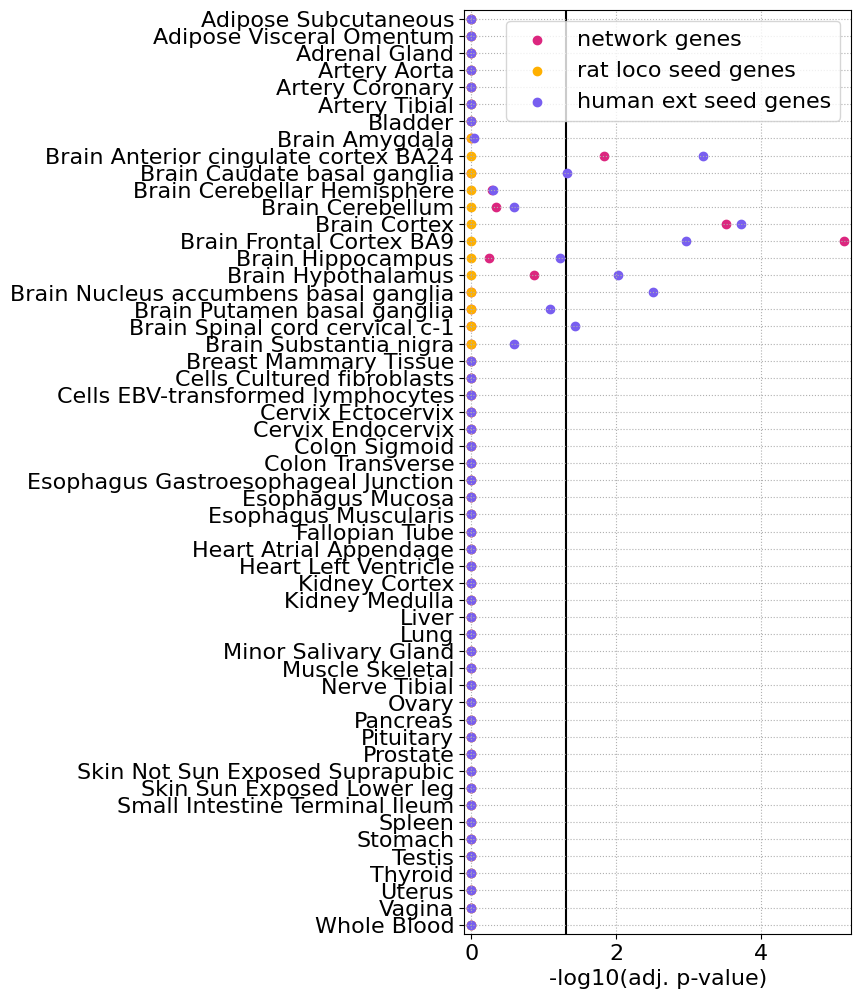

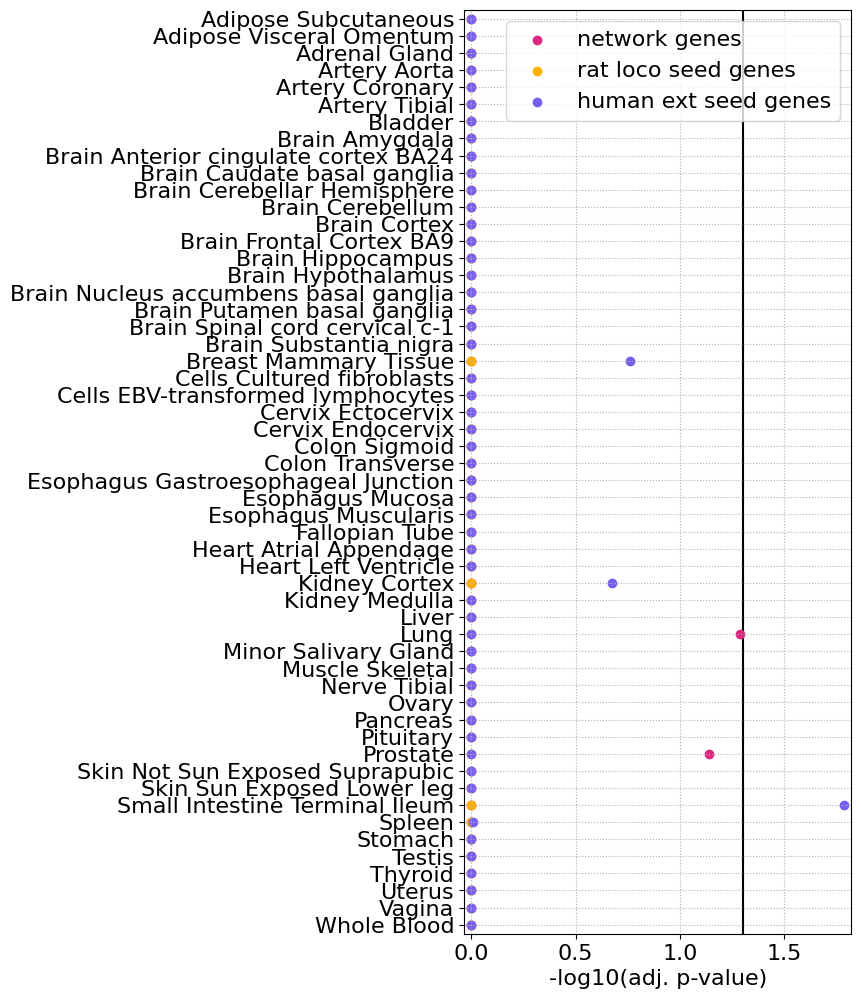

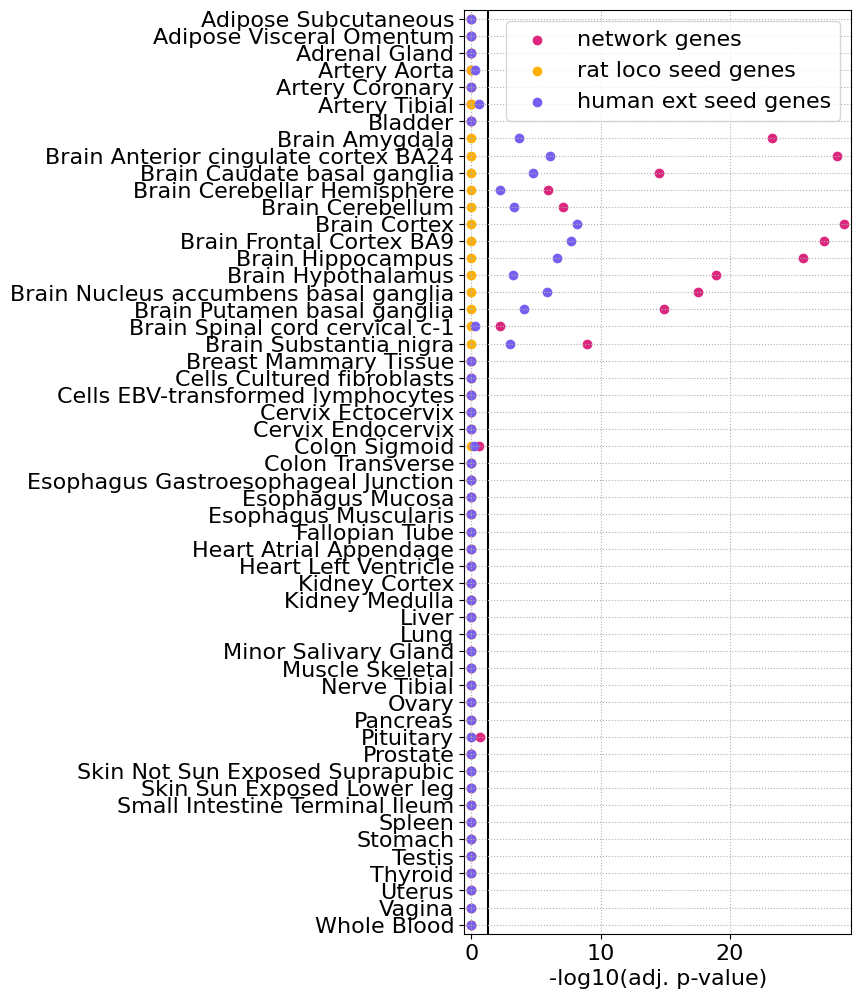

In [12]:
all_genesets = sorted(set.union(*(set(deg[k]['GeneSet']) for k in deg)))
all_genesets=all_genesets[::-1]
trait_to_y = {comm: i for i, comm in enumerate(all_genesets)}


jitter=False



for c in set(deg['shared'].Category):
    plt.figure(figsize=(5, 12))
    
    plt.grid(linestyle=':',zorder=0)
    plt.axvline(x=-np.log10(0.05),color='black',zorder=0)
    
    plt.margins(x=0.02,y=0.01)
    
    for d in deg.keys():
        if jitter:
            offset=offsets[d]
        else:
            offset=0.0
        t=deg[d][deg[d]['Category']==c]
        t['y_numeric'] = t['GeneSet'].map(trait_to_y)
        plt.scatter(y=t['y_numeric']+offset,x=-np.log10(t.adjP),color=colour_dict[d],label=label_dict[d])
    plt.yticks(list(trait_to_y.values()), list(trait_to_y.keys()));

    plt.xlabel('-log10(adj. p-value)')
    #plt.xticks(list(trait_to_y.values()), list(trait_to_y.keys()),rotation=90);
    plt.legend()
    plt.savefig(f'figures/DEG_54_{c}.svg')